# Zara Inventory Management : Order Forecast

In [263]:
# Basic Operations
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Evaluations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Saving Model
import pickle

# Warnings
import warnings 
warnings.filterwarnings('ignore')

In [264]:
# Load the data
df = pd.read_csv('zara.csv', sep=';')

In [265]:
# See overview of the data
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [266]:
 # See how many columns and rows are available for this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [267]:
# Check duplicated value
df.duplicated().sum()

0

In [268]:
# Change date column type and format
df['scraped_at'] = pd.to_datetime(df['scraped_at'], errors='coerce')

In [269]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19 08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19 08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19 08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19 08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19 08:50:08.453847,jackets,MAN


In [271]:
# Create time-based features
df['Month'] = df['scraped_at'].dt.strftime('%m')
df['Year'] = df['scraped_at'].dt.strftime('%Y')

In [272]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,Month,Year
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19 08:50:05.654618,jackets,MAN,02,2024
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19 08:50:06.590930,jackets,MAN,02,2024
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19 08:50:07.301419,jackets,MAN,02,2024
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19 08:50:07.882922,jackets,MAN,02,2024
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19 08:50:08.453847,jackets,MAN,02,2024


### Preprocessing Data

In [276]:
transformer = ColumnTransformer([('onehot',OneHotEncoder(drop ='first'), ['Product Position', 'Promotion', 'Seasonal', 'terms', 'section'])
                              ], remainder = 'passthrough')

In [277]:
# Testing the transformer
transformer.fit_transform(df)

array([[0.0, 0.0, 0.0, ..., Timestamp('2024-02-19 08:50:05.654618'),
        '02', '2024'],
       [0.0, 0.0, 0.0, ..., Timestamp('2024-02-19 08:50:06.590930'),
        '02', '2024'],
       [1.0, 0.0, 1.0, ..., Timestamp('2024-02-19 08:50:07.301419'),
        '02', '2024'],
       ...,
       [0.0, 0.0, 0.0, ..., Timestamp('2024-02-19 09:10:45.009106'),
        '02', '2024'],
       [0.0, 1.0, 1.0, ..., Timestamp('2024-02-19 09:10:45.631804'),
        '02', '2024'],
       [0.0, 1.0, 0.0, ..., Timestamp('2024-02-19 09:10:31.877972'),
        '02', '2024']], dtype=object)

### Split Data into Train and Test Sets

In [279]:
X = df[['Product Position', 'Promotion', 'Seasonal', 'terms', 'section']]
y = df[['Sales Volume']]

In [280]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2024)

### Models Benchmarks

### 1. Random Forest Regressor

In [281]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [282]:
rf_estimator = Pipeline([('transformer', transformer),
                    ('model', rf_model)])

In [283]:
rf_estimator.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product Position',
                                                   'Promotion', 'Seasonal',
                                                   'terms', 'section'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [284]:
rf_predictions = rf_estimator.predict(X_test)

### 2. XGBoost Regressor

In [285]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [286]:
xgb_estimator = Pipeline([('transformer', transformer),
                    ('model', xgb_model)])

In [287]:
xgb_estimator.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product Position',
                                                   'Promotion', 'Seasonal',
                                                   'terms', 'section'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [288]:
xgb_predictions = xgb_estimator.predict(X_test)

### Evaluate Models

In [289]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")

Random Forest RMSE: 802.7249112306482
XGBoost RMSE: 859.8206814195063


The selected model is the one with the higher score which is XGBoost

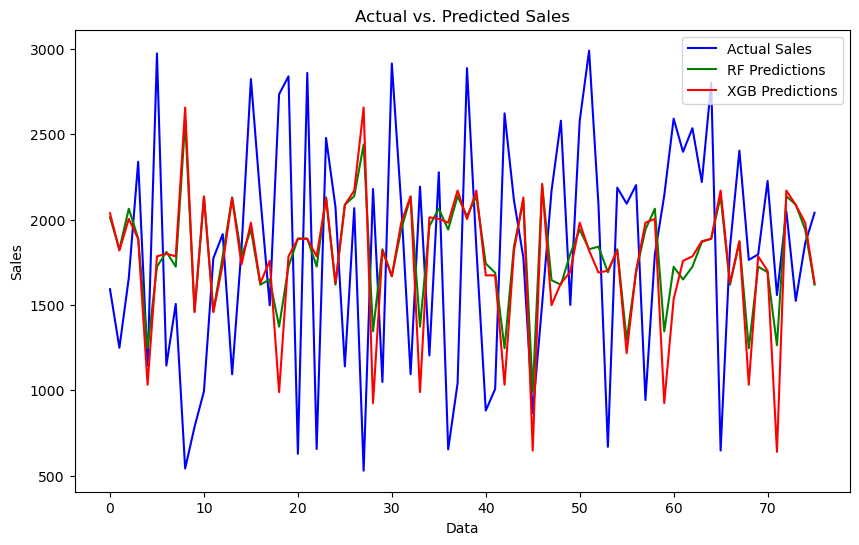

In [294]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(rf_predictions, label='RF Predictions', color='green')
plt.plot(xgb_predictions, label='XGB Predictions', color='red')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### Inventory Optimization

Calculate optimal reorder points and safety stock:
Reorder points (ROP) = Lead Time Demand + Safety Stock
Safety Stock (SS) = z x squared lead time x std of demand quadrant

Where,
z = z-score based on desired service level

In [295]:
df['Lead Time'] = 7  # Example lead time in days
df['Safety Stock'] = 1.65 * df['Sales Volume'].std()  # 90% service level
df['Reorder Point'] = df['Lead Time'] * df['Sales Volume'] + df['Safety Stock']

In [296]:
# Identify overstock and stockout situations
df['Overstock'] = df['Sales Volume'] - df['Reorder Point']
df['Stockout Risk'] = df['Reorder Point'] - df['Sales Volume']

###  Automate Inventory Recommendations

In [297]:
# Generate alerts for products requiring restocking
restock_alerts = df[df['Stockout Risk'] > 0]
restock_alerts

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,...,scraped_at,terms,section,Month,Year,Lead Time,Safety Stock,Reorder Point,Overstock,Stockout Risk
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,...,2024-02-19 08:50:05.654618,jackets,MAN,02,2024,7,1151.211185,20912.211185,-18089.211185,18089.211185
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,...,2024-02-19 08:50:06.590930,jackets,MAN,02,2024,7,1151.211185,5729.211185,-5075.211185,5075.211185
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,...,2024-02-19 08:50:07.301419,jackets,MAN,02,2024,7,1151.211185,16691.211185,-14471.211185,14471.211185
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,...,2024-02-19 08:50:07.882922,jackets,MAN,02,2024,7,1151.211185,12127.211185,-10559.211185,10559.211185
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,...,2024-02-19 08:50:08.453847,jackets,MAN,02,2024,7,1151.211185,21745.211185,-18803.211185,18803.211185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,159182,Front of Store,Yes,Clothing,No,1014,Zara,https://www.zara.com/us/en/basic-100-wool-swea...,321993245-500-2,FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,...,2024-02-19 09:10:43.883037,jackets,MAN,02,2024,7,1151.211185,8249.211185,-7235.211185,7235.211185
248,199233,Aisle,Yes,Clothing,No,2222,Zara,https://www.zara.com/us/en/colorblock-knit-cro...,330590505-500-2,CONTRASTING PATCHES BOMBER JACKET,...,2024-02-19 09:10:44.463883,jackets,MAN,02,2024,7,1151.211185,16705.211185,-14483.211185,14483.211185
249,137044,Aisle,No,Clothing,Yes,2534,Zara,https://www.zara.com/us/en/hooded-technical-ja...,320680326-107-39,PATCH BOMBER JACKET,...,2024-02-19 09:10:45.009106,jackets,MAN,02,2024,7,1151.211185,18889.211185,-16355.211185,16355.211185
250,154736,Front of Store,Yes,Clothing,Yes,1466,Zara,https://www.zara.com/us/en/houndstooth-suit-ja...,311292244-800-39,CROPPED BOMBER JACKET LIMITED EDITION,...,2024-02-19 09:10:45.631804,jackets,MAN,02,2024,7,1151.211185,11413.211185,-9947.211185,9947.211185


In [298]:
# Highlight overstock products for redistribution
overstock_alerts = df[df['Overstock'] > 0]
overstock_alerts

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,...,scraped_at,terms,section,Month,Year,Lead Time,Safety Stock,Reorder Point,Overstock,Stockout Risk


The general issue in this Zara data the product need to be restocked

### Saving Model

In [299]:
xgb_estimator.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product Position',
                                                   'Promotion', 'Seasonal',
                                                   'terms', 'section'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [300]:
filename='orderforecast.sav'

In [301]:
pickle.dump(xgb_estimator, open(filename,'wb'))

In [302]:
loaded_model=pickle.load(open(filename, 'rb'))

In [303]:
loaded_model.predict(X_test)

array([1933.3938 , 1836.7384 , 1984.5577 , 1978.4395 , 1841.7961 ,
       1882.4319 , 1737.949  , 1882.4319 , 1946.5087 , 1418.097  ,
       1589.9066 , 1418.097  , 1782.3287 , 2057.6416 , 1782.3287 ,
       1920.7915 , 1835.5858 , 1949.7383 , 1949.7458 , 1882.4319 ,
       1978.4395 , 1978.4395 , 1882.4319 , 2057.6416 , 1835.5858 ,
       1339.9208 , 1879.5789 ,  573.1541 , 1743.9396 , 1836.7384 ,
       2900.9563 , 1920.7915 , 1589.9066 , 1949.7458 , 1852.2272 ,
       1984.5577 , 1920.7915 , 1879.5789 , 2278.0984 , 1879.5789 ,
       1540.3053 , 1061.0974 , 1841.7961 , 1889.4711 , 1821.6073 ,
        761.68274, 2081.5112 , 2113.9263 , 1835.5858 , 1628.524  ,
       1920.7915 , 1836.7384 , 2093.952  , 1700.6244 , 1836.7384 ,
       1519.8596 , 1700.6244 , 1920.7915 , 1984.5577 , 1743.9396 ,
       1892.3405 , 1949.7383 , 1882.4319 , 1953.6182 , 1978.4395 ,
       1879.5789 , 1835.5858 , 1953.6182 , 1841.7961 , 1882.4319 ,
       1700.6244 , 1560.6105 , 1879.5789 , 1339.9208 , 1920.79

### Prediction

In [304]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,...,scraped_at,terms,section,Month,Year,Lead Time,Safety Stock,Reorder Point,Overstock,Stockout Risk
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,...,2024-02-19 08:50:05.654618,jackets,MAN,02,2024,7,1151.211185,20912.211185,-18089.211185,18089.211185
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,...,2024-02-19 08:50:06.590930,jackets,MAN,02,2024,7,1151.211185,5729.211185,-5075.211185,5075.211185
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,...,2024-02-19 08:50:07.301419,jackets,MAN,02,2024,7,1151.211185,16691.211185,-14471.211185,14471.211185
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,...,2024-02-19 08:50:07.882922,jackets,MAN,02,2024,7,1151.211185,12127.211185,-10559.211185,10559.211185
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,...,2024-02-19 08:50:08.453847,jackets,MAN,02,2024,7,1151.211185,21745.211185,-18803.211185,18803.211185


In [306]:
df = df.drop(columns = ['url', 'description'], axis = 1)

In [307]:
df_pred=pd.DataFrame({
    'Product ID' : [112918],
    'Product Position' : ['End-cap'],
    'Promotion' : ['Yes'],
    'Product Category' : ['Clothing'],
    'Seasonal' : ['Yes'],
    'brand' : ['Zara'],
    'sku' : ['328303236-420-44'],
    'name' : ['STRETCH SUIT JACKET'],
    'scraped_at' : ['2024-02-22 10:50:07.882922'],
    'terms': ['jackets'],
    'section' : ['WOMAN'],
    'Month' : [2],
    'Year' : [2024],
    'Lead Time' : [7],
    'Safety Stock' : [1151.211185],
    'Overstock': [-14471.211185],
    'Stockout Risk': [18803.211185]
})

In [308]:
df_pred

,Product ID,Product Position,Promotion,Product Category,Seasonal,brand,sku,name,scraped_at,terms,section,Month,Year,Lead Time,Safety Stock,Overstock,Stockout Risk
0,112918,End-cap,Yes,Clothing,Yes,Zara,328303236-420-44,STRETCH SUIT JACKET,2024-02-22 10:50:07.882922,jackets,WOMAN,2,2024,7,1151.211185,-14471.211185,18803.211185


In [309]:
loaded_model.predict(df_pred)

array([2222.2156], dtype=float32)

#### With the sample input data, using XGBoost Regressor model, the predicted sales volume is 2222 units

### Thank you